In [1]:
import numpy as np
import pandas as pd

In [24]:
df = pd.DataFrame([[8,8,4],[7,9,5],[6,10,6],[5,12,7]], columns = ['cgpa','resume_score','lpa'])
df

,cgpa,resume_score,lpa
0,8,8,4
1,7,9,5
2,6,10,6
3,5,12,7


In [25]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [26]:
model = Sequential()

model.add(Dense(2,activation = 'linear',input_dim = 2))
model.add(Dense(1,activation = 'linear'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.get_weights()

[array([[-0.27009773,  0.71118474],
        [-0.84308994,  0.1811986 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.710672],
        [1.076995]], dtype=float32),
 array([0.], dtype=float32)]

In [29]:
new_weights = [np.array([[0.1, 0.1], [0.1 , 0.1]], dtype=np.float32),
               np.array([0., 0.], dtype=np.float32),
               np.array([[0.1],[0.1]], dtype = np.float32),
               np.array([0.], dtype = np.float32)]

In [30]:
model.set_weights(new_weights)

In [31]:
model.get_weights()

[array([[0.1, 0.1],
        [0.1, 0.1]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.1],
        [0.1]], dtype=float32),
 array([0.], dtype=float32)]

In [32]:
optimizer = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss = 'mean_squared_error',optimizer=optimizer)

In [33]:
history= model.fit(df.iloc[:,0:-1].values,df['lpa'].values, epochs=200,verbose=1, batch_size=1)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 34.2436  
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31.4782 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26.0600 
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21.8311 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30.5358 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26.9980 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26.6206 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27.0667 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30.5473 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24.9571 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27.9070 
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27.4519 
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23.0332 
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26.0105 
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26.0114 
Epo

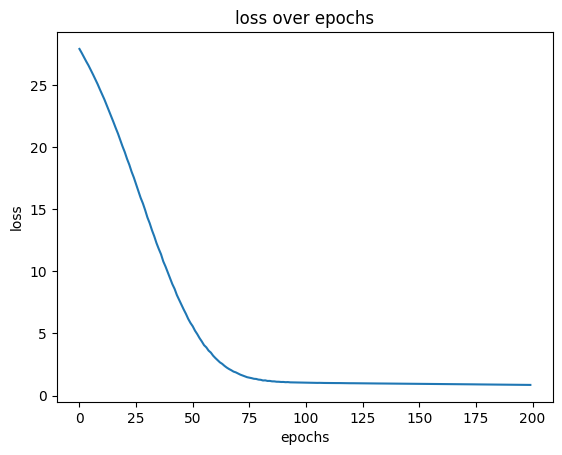

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('loss over epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()